# Data Wrangling

Importing and Combining PM2.5 Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
pm25_2015 = pd.read_csv("pm2.5_2015.csv")
pm25_2016 = pd.read_csv("pm2.5_2016.csv")
pm25_2017 = pd.read_csv("pm2.5_2017.csv")
pm25_2018 = pd.read_csv("pm2.5_2018.csv")
pm25_2019 = pd.read_csv("pm2.5_2019.csv")
pm25_2020 = pd.read_csv("pm2.5_2020.csv")
pm25_2021 = pd.read_csv("pm2.5_2021.csv")
pm25_2022 = pd.read_csv("pm2.5_2022.csv")
pm25_2023 = pd.read_csv("pm2.5_2023.csv")
pm25_2024 = pd.read_csv("pm2.5_2024.csv")

In [6]:
pm25_data = pd.concat([pm25_2015, pm25_2016, pm25_2017, pm25_2018, pm25_2019, pm25_2020, pm25_2021, pm25_2022, pm25_2023, pm25_2024], ignore_index=True)

In [7]:
pm25_data["Date"] = pd.to_datetime(pm25_data["Date"])

In [9]:
pm25_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535775 entries, 0 to 535774
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Date                            535775 non-null  datetime64[ns]
 1   Source                          535775 non-null  object        
 2   Site ID                         535775 non-null  int64         
 3   POC                             535775 non-null  int64         
 4   Daily Mean PM2.5 Concentration  535775 non-null  float64       
 5   Units                           535775 non-null  object        
 6   Daily AQI Value                 535775 non-null  int64         
 7   Local Site Name                 533488 non-null  object        
 8   Daily Obs Count                 535775 non-null  int64         
 9   Percent Complete                535775 non-null  float64       
 10  AQS Parameter Code              535775 non-null  int64  

In [10]:
pm25_data['County'].unique()

array(['Alameda', 'Alpine', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Ventura',
       'Yolo'], dtype=object)

In [11]:
pm25_data['Daily AQI Value'].describe()

count    535775.000000
mean         42.129032
std          26.176041
min           0.000000
25%          24.000000
50%          41.000000
75%          55.000000
max        1493.000000
Name: Daily AQI Value, dtype: float64

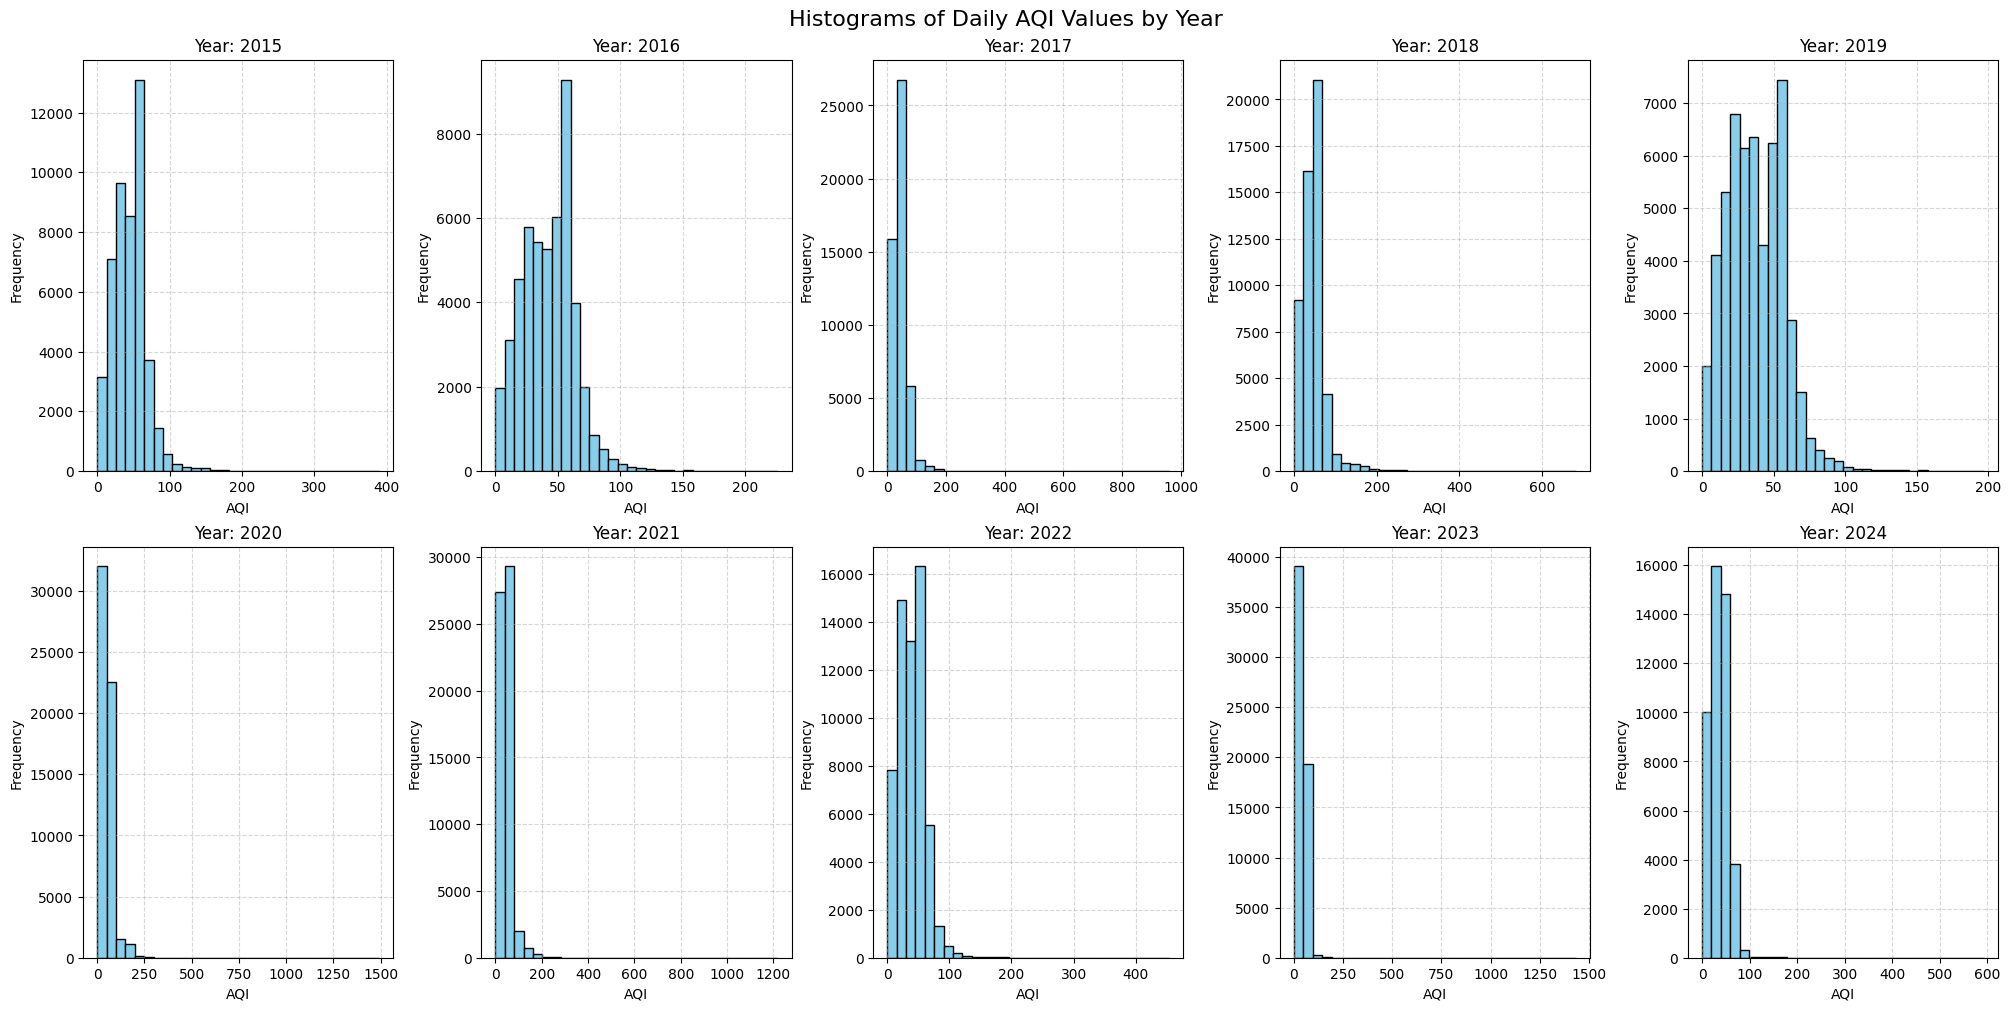

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])  # Convert Date to datetime
pm25_data['Year'] = pm25_data['Date'].dt.year  # Extract year

# Extract unique years
unique_years = sorted(pm25_data['Year'].unique())

# Create subplots for histograms
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

# Loop through each year and plot histogram
for i, year in enumerate(unique_years):
    row, col = divmod(i, 5)  # Determine the subplot position
    ax = axes[row, col]
    
    # Filter data for the specific year
    year_data = pm25_data[pm25_data['Year'] == year]
    
    # Plot histogram for AQI values
    ax.hist(year_data['Daily AQI Value'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Year: {year}', fontsize=12)
    ax.set_xlabel('AQI', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.5, linestyle='--')

# Add a global title
fig.suptitle('Histograms of Daily AQI Values by Year', fontsize=16)
plt.show()


In [104]:
# Find the 100 highest AQI values for each year, keeping only Year and AQI
top_10_aqi_per_year = pm25_data.groupby('Year').apply(
    lambda group: group.nlargest(10, 'Daily AQI Value')[['Year', 'Daily AQI Value']]
).reset_index(drop=True)

# Display the result
print(top_10_aqi_per_year)


    Year  Daily AQI Value
0   2015              390
1   2015              313
2   2015              240
3   2015              214
4   2015              206
..   ...              ...
95  2024              208
96  2024              208
97  2024              196
98  2024              179
99  2024              174

[100 rows x 2 columns]


/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/699762335.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_aqi_per_year = pm25_data.groupby('Year').apply(


In [ ]:
# pm25_data = pm25_data[pm25_data['Daily AQI Value'] <= 500]


Monthly Average PM2.5 AQI for Butte County and Plumas County vs All Other Counties

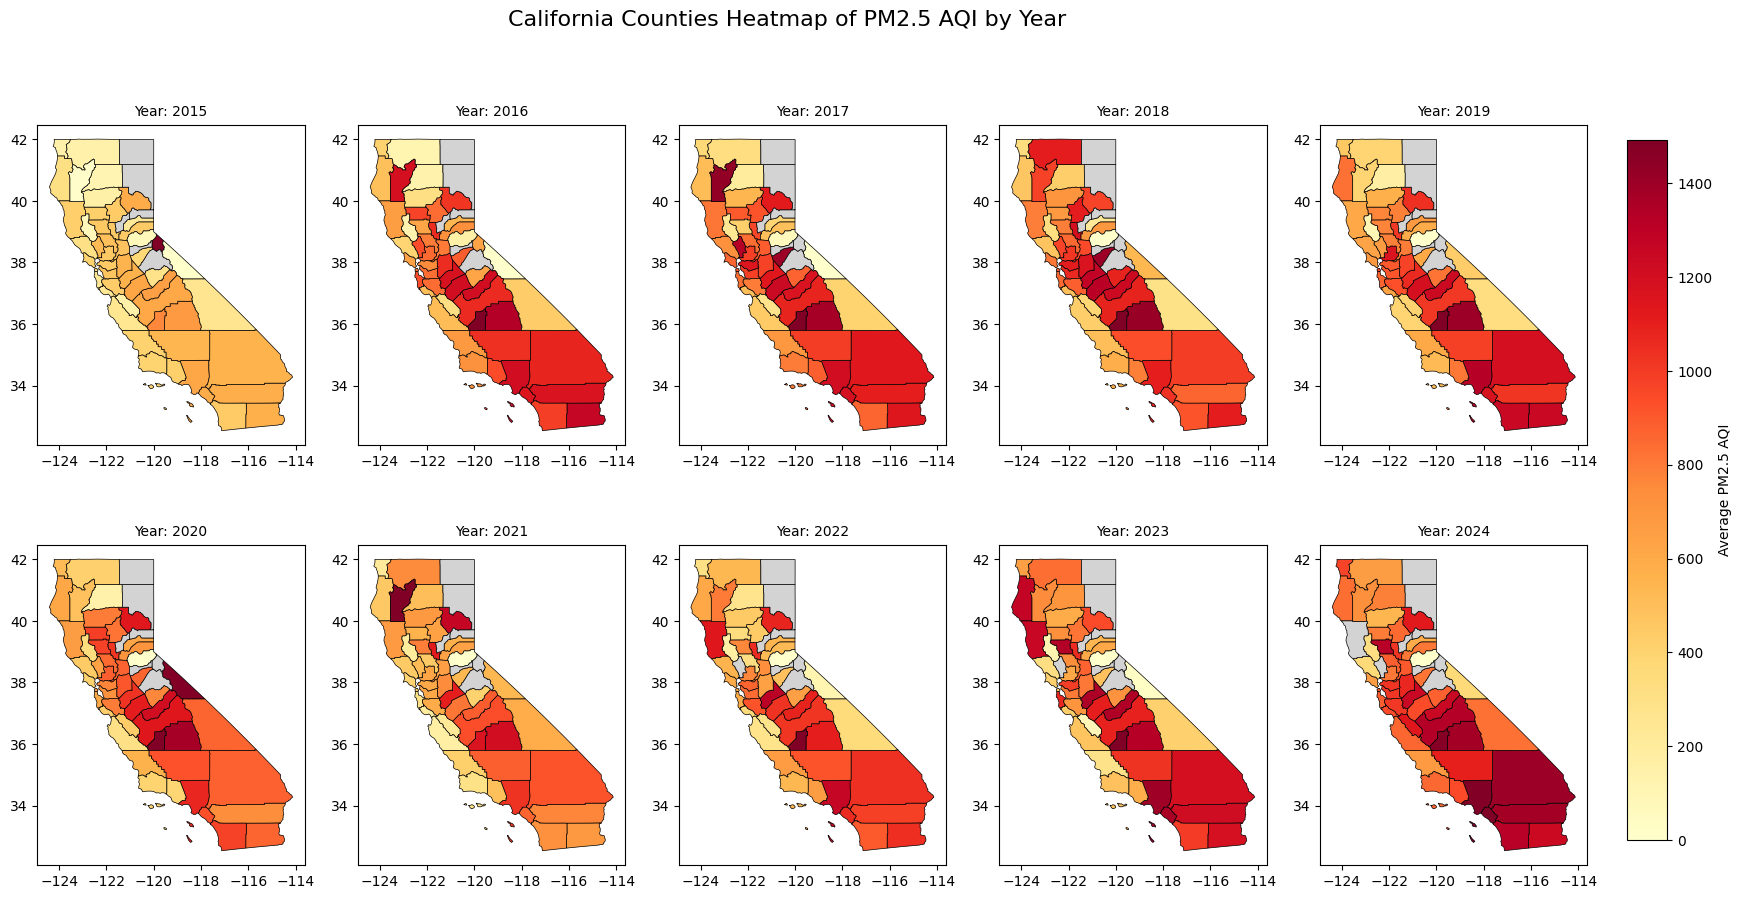

In [105]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Ensure the 'County' column in pm25_data matches the GeoJSON's 'NAME' column
pm25_data['County'] = pm25_data['County'].str.title()  # Adjust capitalization if needed
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
pm25_data['Year'] = pm25_data['Date'].dt.year

# Create a grid of subplots (2 rows x 5 columns for 10 years)
unique_years = sorted(pm25_data['Year'].unique())  # Get unique years
n_years = len(unique_years)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Set up a color normalization for consistent scaling
vmin = pm25_data['Daily AQI Value'].min()
vmax = pm25_data['Daily AQI Value'].max()

# Loop through each year and create a heatmap
for i, year in enumerate(unique_years):
    # Filter data for the specific year
    year_data = pm25_data[pm25_data['Year'] == year]
    
    # Group by County and calculate the average AQI for the year
    county_aqi = year_data.groupby('County')['Daily AQI Value'].mean().reset_index()
    county_aqi.columns = ['NAME', 'Average AQI']  # Rename to match GeoJSON's 'NAME' column
    
    # Merge GeoJSON with AQI data for the year
    merged_geo = california_geojson.merge(county_aqi, on='NAME', how='left')
    
    # Determine subplot row and column
    row, col = divmod(i, 5)
    
    # Plot heatmap for the year
    ax = axes[row, col]
    merged_geo.plot(
        column='Average AQI',
        cmap='YlOrRd',  # Sequential colormap for AQI values
        legend=False,  # Turn off individual legends
        edgecolor='black',
        linewidth=0.5,
        ax=ax,
        missing_kwds={"color": "lightgrey", "label": "No Data"}
    )
    
    ax.set_title(f'Year: {year}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust the overall layout to make space for the colorbar
fig.subplots_adjust(right=0.9)  # Leave space to the right for the colorbar

# Add a single colorbar outside the grid
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these values to avoid overlap
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Dummy array for the colorbar
fig.colorbar(sm, cax=cax, label='Average PM2.5 AQI')

# Add a global title and show the plot
fig.suptitle('California Counties Heatmap of PM2.5 AQI by Year', fontsize=16)
plt.show()




<Figure size 1200x800 with 0 Axes>

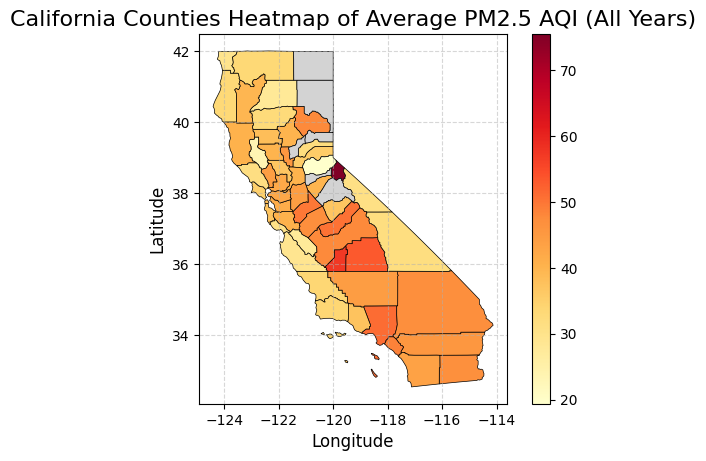

In [96]:
# Group by County and calculate the mean AQI across all years
county_aqi_all_years = pm25_data.groupby('County')['Daily AQI Value'].mean().reset_index()
county_aqi_all_years.columns = ['NAME', 'Average AQI']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with AQI data using the 'NAME' column
merged_geo_all_years = california_geojson.merge(county_aqi_all_years, on='NAME', how='left')

# Plot the heatmap
plt.figure(figsize=(12, 8))
merged_geo_all_years.plot(
    column='Average AQI',
    cmap='YlOrRd',  # Sequential colormap for AQI values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average PM2.5 AQI (All Years)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Daily Average Levels of NO₂, O₃, and CO Over Time

Monthly Average Levels of NO₂, O₃, and CO Over Time

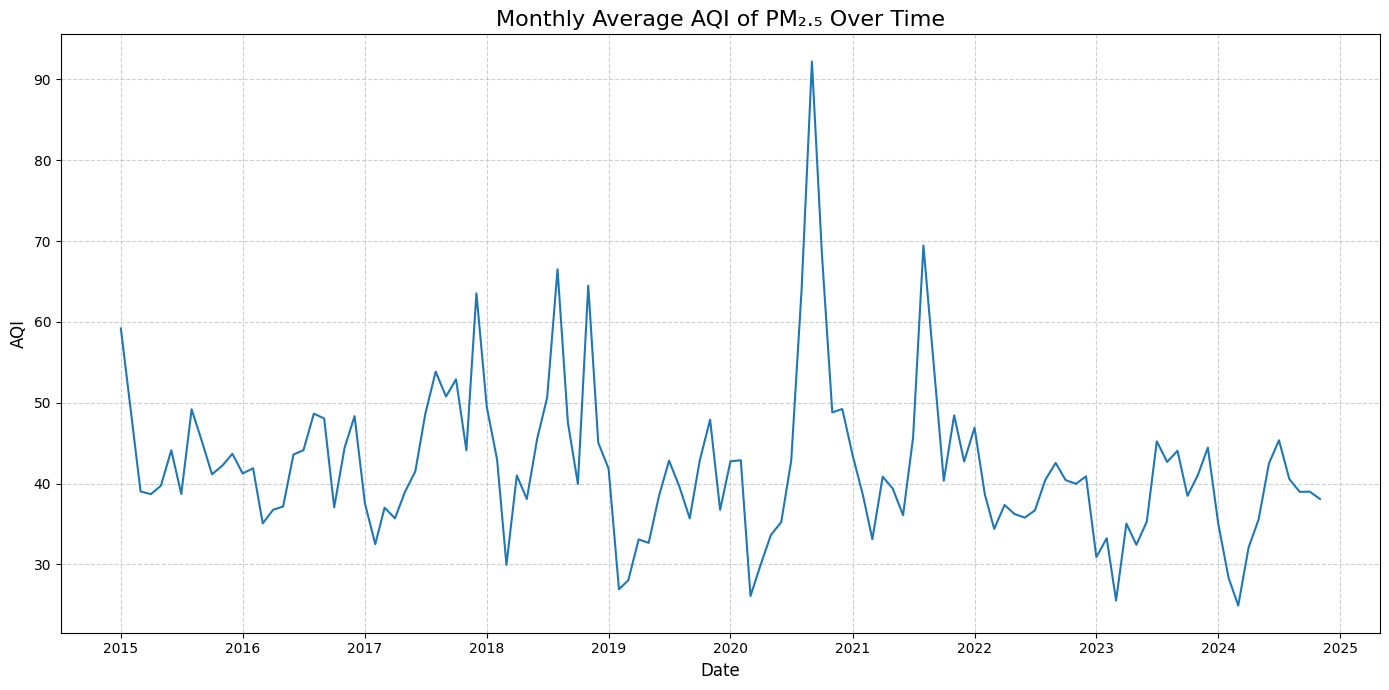

In [114]:
import matplotlib.pyplot as plt

# Prepare the PM2.5 data (using Daily Mean PM2.5 Concentration)
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
pm25_data['YearMonth'] = pm25_data['Date'].dt.to_period('M')
pm25_monthly_avg = pm25_data.groupby('YearMonth')['Daily AQI Value'].mean().reset_index()
pm25_monthly_avg['YearMonth'] = pm25_monthly_avg['YearMonth'].dt.to_timestamp()
pm25_monthly_avg.columns = ['YearMonth', 'PM2.5']  # Rename for consistency

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(pm25_monthly_avg["YearMonth"], pm25_monthly_avg['PM2.5'])

# Customize the plot
plt.title('Monthly Average AQI of PM₂.₅ Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

